In [1]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19  
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'C:\Users\SRIDHAR\Downloads\archive\chest_xray\train'
valid_path = r'C:\Users\SRIDHAR\Downloads\archive\chest_xray\test'


In [3]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob(r'C:\Users\SRIDHAR\Downloads\archive\chest_xray\train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy', Precision(), Recall()]
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'C:\Users\SRIDHAR\Downloads\archive\chest_xray\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 16327 images belonging to 5 classes.


In [12]:
test_set = test_datagen.flow_from_directory(r'C:\Users\SRIDHAR\Downloads\archive\chest_xray\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3273 images belonging to 5 classes.


In [13]:

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\SRIDHAR\AppData\Local\Temp\ipykernel_17836\2368496102.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
511/511 [==============================] - 2525s 5s/step - loss: 0.4853 - accuracy: 0.8178 - precision: 0.8419 - recall: 0.7943 - val_loss: 0.3997 - val_accuracy: 0.8595 - val_precision: 0.8695 - val_recall: 0.8509
Epoch 2/50
511/511 [==============================] - 2419s 5s/step - loss: 0.3658 - accuracy: 0.8676 - precision: 0.8776 - recall: 0.8578 - val_loss: 0.4594 - val_accuracy: 0.8509 - val_precision: 0.8582 - val_recall: 0.8411
Epoch 3/50
511/511 [==============================] - 2771s 5s/step - loss: 0.3468 - accuracy: 0.8754 - precision: 0.8841 - recall: 0.8671 - val_loss: 0.3732 - val_accuracy: 0.8799 - val_precision: 0.8875 - val_recall: 0.8723
Epoch 4/50
511/511 [==============================] - 2614s 5s/step - loss: 0.3048 - accuracy: 0.8927 - precision: 0.8995 - recall: 0.8852 - val_loss: 0.3820 - val_accuracy: 0.8756 - val_precision: 0.8831 - val_recall: 0.8726
Epoch 5/50
511/511 [==============================] - 2560s 5s/step - loss: 0.3014 - accuracy: 0

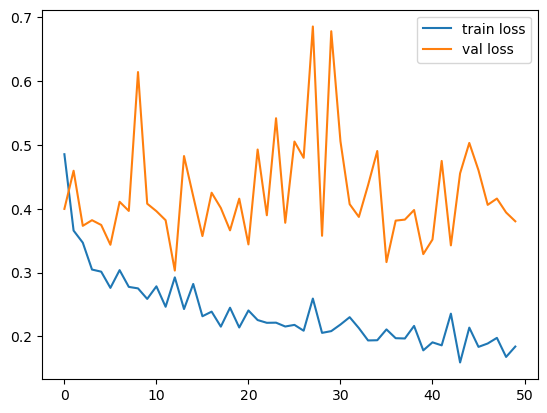

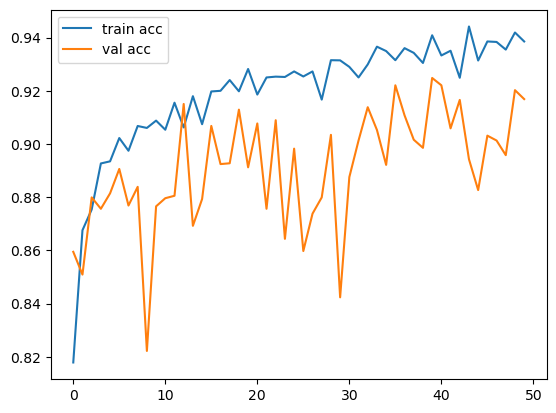

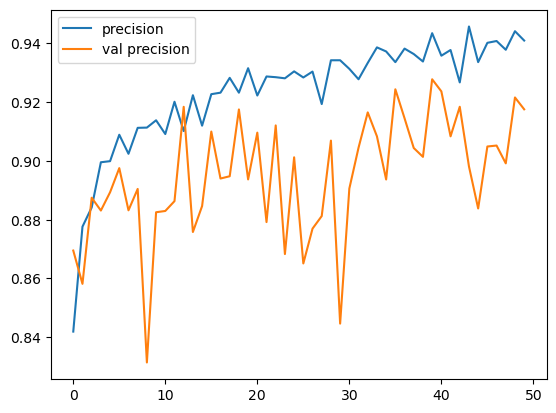

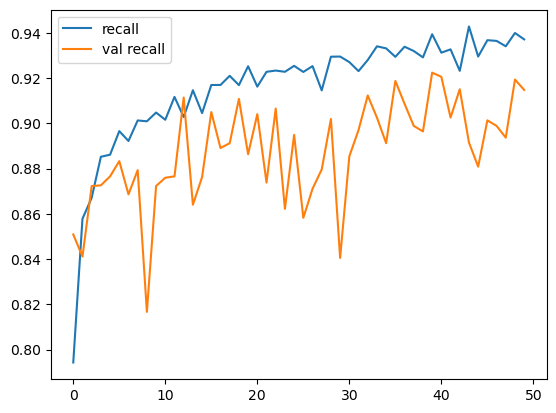

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
# plt.plot(r.history['val_loss'], label='validation loss')
# plt.plot(r.history['accuracy'], label='model accuracy')
plt.legend()
# plt.ylim(1, 100)
plt.show()
plt.savefig('LossVal_loss')
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc') 
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
# plt.ylim(1, 100)
plt.show()
plt.savefig('AccVal_acc')
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val precision')
plt.legend()
# plt.ylim(1, 100)
plt.show()
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val recall')
plt.legend()
# plt.ylim(1, 100)
plt.show()

In [16]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model


model.save('model_vgg19_5class1.h5')

In [21]:
# -*- coding: utf-8 -*-

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.optimizers import Adam
import PIL
import numpy as np
model = load_model('model_vgg19_5class.h5',compile=False)
# Recompile with compatible optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
img = image.load_img(r'C:\Users\SRIDHAR\Downloads\archive\chest_xray\val\PNEUMONIA\person1946_bacteria_4875.jpeg', target_size =(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data) 
class_labels = ["COVID", "LUNGOPACITY", "LUNGCANCER" , "NORMAL", "PNEUMONIA"]

for i in range(5):
    if classes[0, i] > 0.5:  # Assuming binary classification, adjust threshold accordingly
        print(f"Image is predicted to be {class_labels[i]} with probability {classes[0, i]}")


1/1 [==============================] - 1s 600ms/step
Image is predicted to be PNEUMONIA with probability 1.0
